In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
df = pd.read_csv("/content/smart_neighborhood_dataset_large.csv")

# 1. Clean null values (you can choose to drop or fill; here we fill with median for numeric, mode for categorical)
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

# 2. Normalize numeric features
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 3. Encode categorical features
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


# Simulate missing values
np.random.seed(42)
df['area_sqft'] = np.random.randint(800, 2500, size=len(df))
df['population'] = np.random.randint(5000, 30000, size=len(df))
df['crime_count'] = (df['Crime_Rate'] / 100) * df['population']

# 4. Create new features
# Example: price per square foot (assuming 'price' and 'area_sqft
df['price_per_sqft'] = df['House_Price'] / (df['area_sqft'] + 1e-5)
df['crime_per_1000'] = df['crime_count'] / (df['population'] + 1e-5) * 1000

# Preview cleaned and processed data
print(df.head())
print(df)
print(df.columns)

<ipython-input-3-a931118ad507>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-3-a931118ad507>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

   Neighborhood  House_Price  Crime_Rate  Education_Level  Employment_Rate  \
0            14     0.160755      0.3714                0          0.34600   
1            11     0.583259      0.8924                2          0.62825   
2            16     0.438118      0.3294                0          0.09800   
3            13     0.422219      0.9396                2          0.40625   
4            17     0.535724      0.0820                2          0.72700   

   Distance_to_City_Center_km  Public_Transport_Access  Sentiment_Score  \
0                    0.120091                        0            0.880   
1                    0.005673                        2            0.710   
2                    0.052365                        2            0.685   
3                    0.275964                        2            0.500   
4                    0.158056                        2            0.930   

   Safety_Label  area_sqft  population  crime_count  price_per_sqft  \
0        

Visualization:
Use Seaborn and Matplotlib to:

● Correlation heatmaps


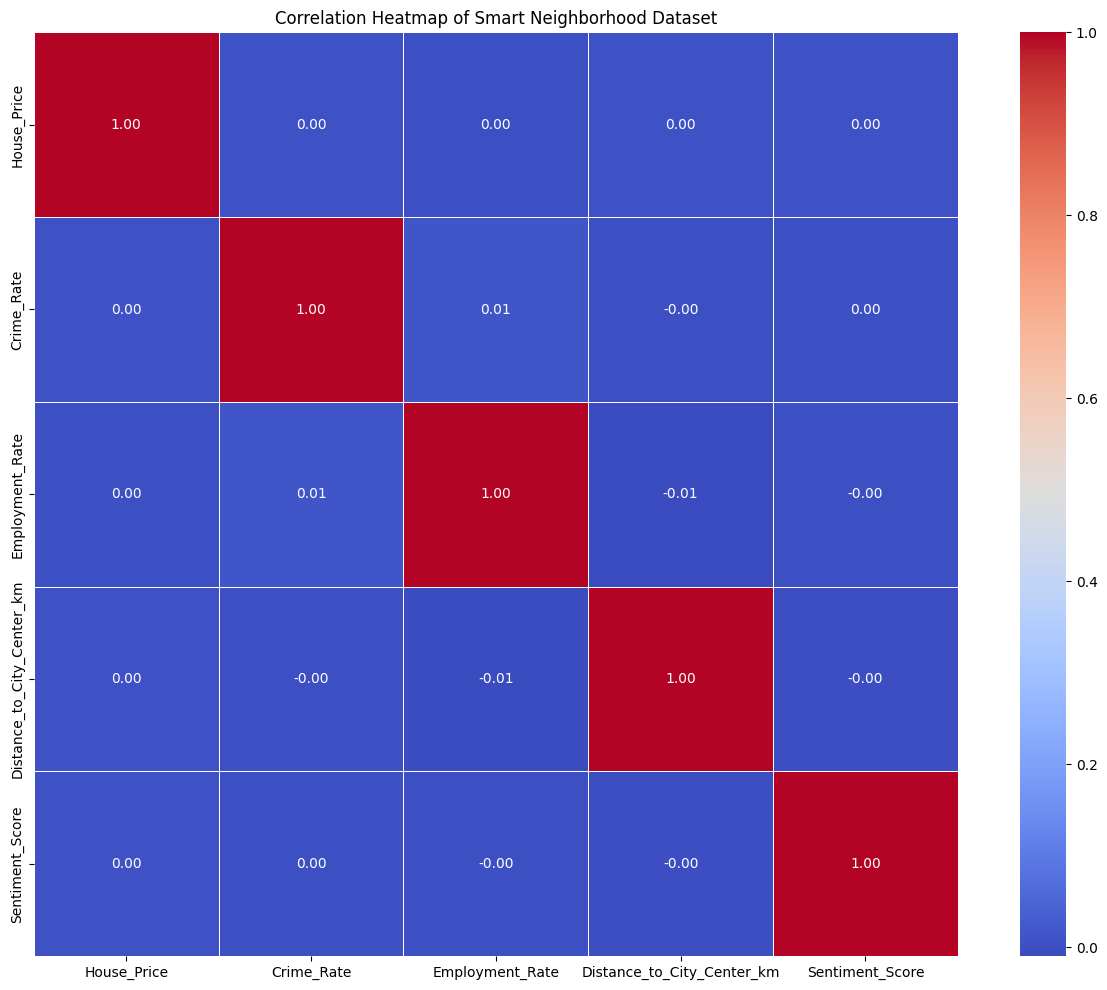

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("smart_neighborhood_dataset_large.csv")  # Replace with your path if needed

# Compute the correlation matrix (only numeric columns)
correlation_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,       # Display correlation coefficients
    fmt=".2f",        # Format to 2 decimal places
    cmap="coolwarm",  # Color scheme
    square=True,
    linewidths=0.5
)

# Add title
plt.title("Correlation Heatmap of Smart Neighborhood Dataset")
plt.show()


● Cluster plots

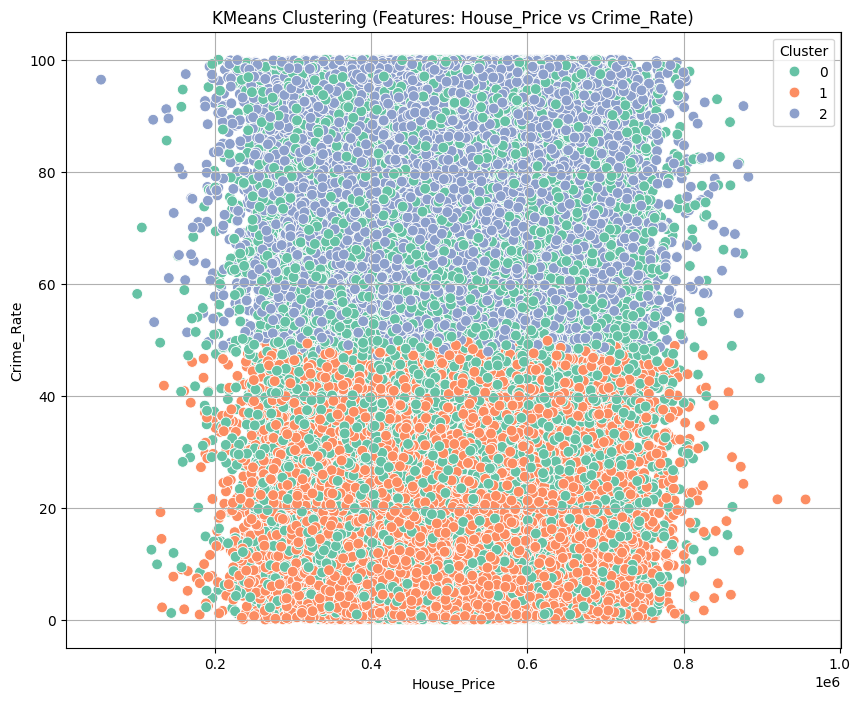

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("smart_neighborhood_dataset_large.csv")

# Select numeric features for clustering
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Optional: drop columns with missing values or fill them
numeric_df = numeric_df.dropna()

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels back to the DataFrame
numeric_df['Cluster'] = clusters

# Choose two features to plot (e.g., first two columns)
feature_x = numeric_df.columns[0]
feature_y = numeric_df.columns[1]

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=numeric_df[feature_x],
    y=numeric_df[feature_y],
    hue=numeric_df['Cluster'],
    palette='Set2',
    s=60
)
plt.title(f"KMeans Clustering (Features: {feature_x} vs {feature_y})")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


● Time trends in housing/crime

Index(['Neighborhood', 'House_Price', 'Crime_Rate', 'Education_Level',
       'Employment_Rate', 'Distance_to_City_Center_km',
       'Public_Transport_Access', 'Sentiment_Score', 'Safety_Label'],
      dtype='object')


<ipython-input-6-d1d964e71d68>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='M')


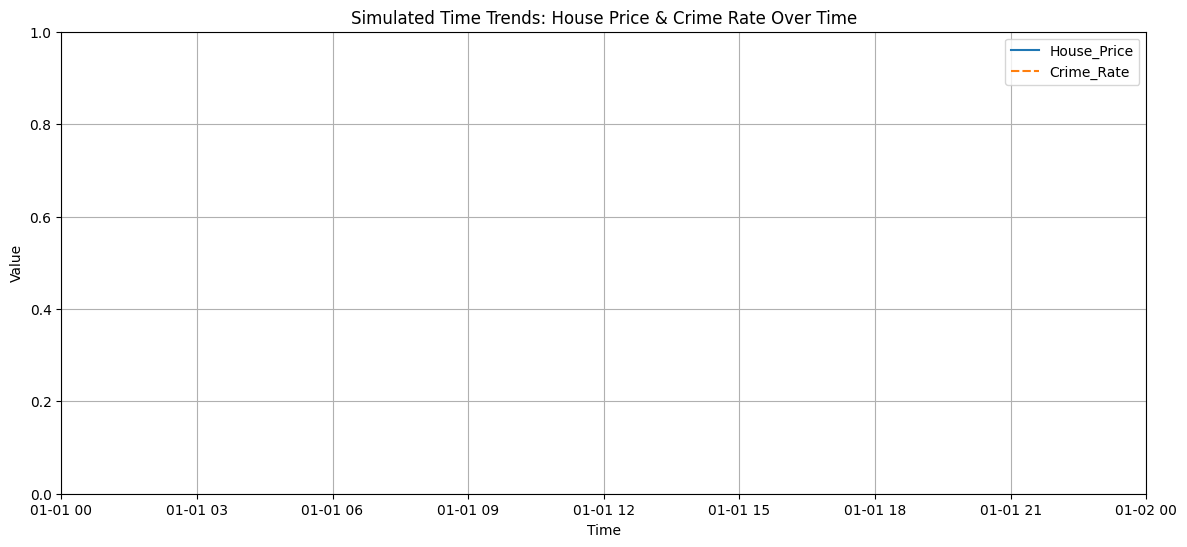

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
original_df = pd.read_csv("smart_neighborhood_dataset_large.csv")  # Keep original DataFrame
print(original_df.columns)

max_periods = 1000  # Set an upper limit for the periods
df = pd.DataFrame({'Value': range(1, max_periods + 1)})

# Simulate monthly timestamps for each row
df['Date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='M')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)


# Get 'House_Price' and 'Crime_Rate' from the original DataFrame
df['House_Price'] = original_df['House_Price'][:max_periods]  # Assuming enough rows
df['Crime_Rate'] = original_df['Crime_Rate'][:max_periods]    # Assuming enough rows

# Plot time trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=df[['House_Price', 'Crime_Rate']])
plt.title("Simulated Time Trends: House Price & Crime Rate Over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()


● Sentiment by neighborhood


   Neighborhood  Average_Sentiment  Number_of_Entries  Min_Sentiment  \
15       Area_5           0.022360               5071           -1.0   
5       Area_14           0.009986               4920           -1.0   
3       Area_12           0.009819               5028           -1.0   
2       Area_11           0.009460               4941           -1.0   
7       Area_16           0.007671               5100           -1.0   
1       Area_10           0.005474               5035           -1.0   
14       Area_4           0.003392               5047           -1.0   
17       Area_7           0.002013               4992           -1.0   
19       Area_9           0.000421               5040           -1.0   
9       Area_18           0.000166               4935           -1.0   
11       Area_2          -0.000319               5015           -1.0   
6       Area_15          -0.000401               4984           -1.0   
13       Area_3          -0.000447               4873           

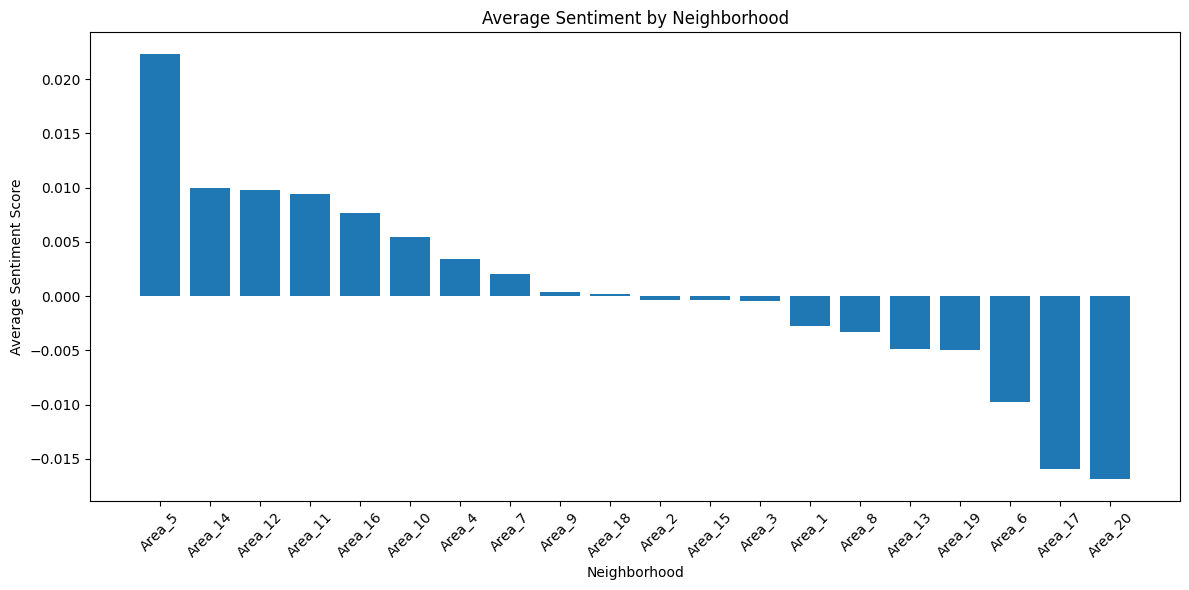

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('smart_neighborhood_dataset_large.csv')

# Group by Neighborhood and calculate average sentiment and count
sentiment_by_neighborhood = (
    df.groupby('Neighborhood')['Sentiment_Score']
      .agg(['mean', 'count', 'min', 'max'])
      .reset_index()
      .rename(columns={
          'mean': 'Average_Sentiment',
          'count': 'Number_of_Entries',
          'min': 'Min_Sentiment',
          'max': 'Max_Sentiment'
      })
      .sort_values('Average_Sentiment', ascending=False)
)

# Display the result
print(sentiment_by_neighborhood)

import matplotlib.pyplot as plt

# Optional: Bar plot of average sentiment by neighborhood
plt.figure(figsize=(12,6))
plt.bar(sentiment_by_neighborhood['Neighborhood'], sentiment_by_neighborhood['Average_Sentiment'])
plt.xlabel('Neighborhood')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment by Neighborhood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [8]:
print(df.head())

  Neighborhood  House_Price  Crime_Rate Education_Level  Employment_Rate  \
0       Area_4       198786       37.14            High            73.84   
1       Area_2       580099       89.24          Medium            85.13   
2       Area_6       449108       32.94            High            63.92   
3       Area_3       434759       93.96          Medium            76.25   
4       Area_7       537198        8.20          Medium            89.08   

   Distance_to_City_Center_km Public_Transport_Access  Sentiment_Score  \
0                       13.76                    Good             0.76   
1                        0.65                    Poor             0.42   
2                        6.00                    Poor             0.37   
3                       31.62                    Poor             0.00   
4                       18.11                    Poor             0.86   

  Safety_Label  
0         Safe  
1         Safe  
2         Safe  
3         Safe  
4         Saf

Machine Learning Models:


● Linear Regression → Predict housing prices


[498814.95912234 500579.60440449 499361.15885253 500448.30639242
 501003.69698346]


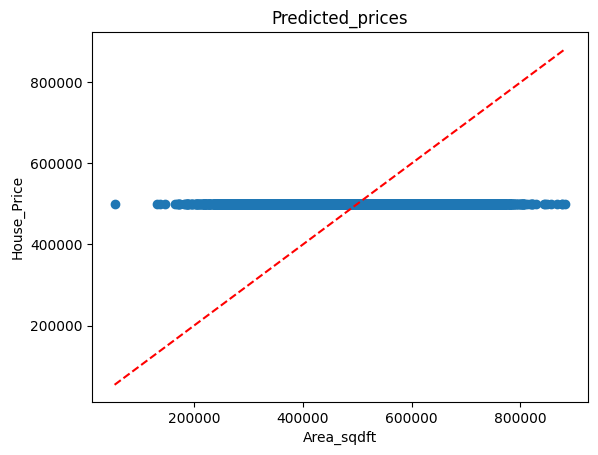

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df=pd.read_csv("/content/smart_neighborhood_dataset_large.csv")

np.random.seed(42)
df['area_sqft'] = np.random.randint(800, 2500, size=len(df))
x = df[['area_sqft']]
y = df['House_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # 80% train, 20% test


model=LinearRegression()
model.fit(x_train,y_train)

predicted_prices=model.predict(x_test)

print(predicted_prices[:5])

plt.scatter(y_test, predicted_prices)
plt.xlabel("Area_sqdft")
plt.ylabel("House_Price")
plt.title("Predicted_prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()


● Logistic Regression → Classify if a location is "Safe" or "Risky"

In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load data
df = pd.read_csv("/content/smart_neighborhood_dataset_large.csv")

# 2. Features and Target (replace with actual column names)
X = df[['Crime_Rate', 'Employment_Rate', 'Sentiment_Score']]
y = df['Safety_Label']  # Assume 'label' is 0 (Safe) or 1 (Risky)

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Prediction
y_pred = model.predict(X_test)

# 6. Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[    0  5959]
 [    0 14041]]

Classification Report:
               precision    recall  f1-score   support

       Risky       0.00      0.00      0.00      5959
        Safe       0.70      1.00      0.82     14041

    accuracy                           0.70     20000
   macro avg       0.35      0.50      0.41     20000
weighted avg       0.49      0.70      0.58     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decission tree

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load data
df = pd.read_csv("/content/smart_neighborhood_dataset_large.csv")

# 2. Features and Target (replace with actual column names)
features = ['Crime_Rate', 'Employment_Rate', 'Sentiment_Score']
target = 'Safety_Label' # 0 for Safe, 1 for Risky

X = df[features]
y = df[target]

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate the model
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))
print("🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🎯 Accuracy: 0.5759

🧾 Classification Report:
               precision    recall  f1-score   support

       Risky       0.30      0.33      0.31      5959
        Safe       0.70      0.68      0.69     14041

    accuracy                           0.58     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.59      0.58      0.58     20000

🧱 Confusion Matrix:
 [[1947 4012]
 [4470 9571]]


 KMeans Clustering

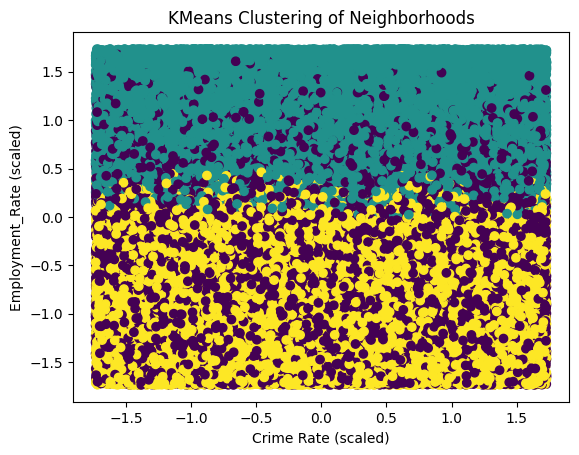

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# 1. Load data
df = pd.read_csv("/content/smart_neighborhood_dataset_large.csv")

# 2. Features and Target (replace with actual column names)
features = ['Crime_Rate', 'Employment_Rate', 'Sentiment_Score']
X = df[features]

# 3. Scale features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Try different values for n_clusters
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# 5. Visualize
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['kmeans_cluster'], cmap='viridis')
plt.xlabel("Crime Rate (scaled)")
plt.ylabel("Employment_Rate (scaled)")
plt.title("KMeans Clustering of Neighborhoods")
plt.show()


DBSCAN clustering

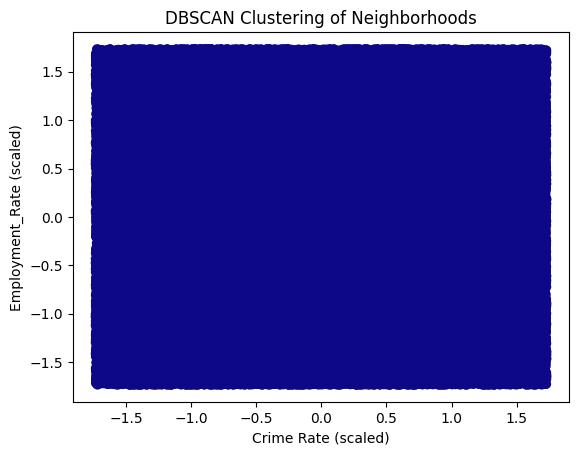

In [6]:
from sklearn.cluster import DBSCAN #doubt why this can't in arbitray shape

# 1. Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=2)  # Tune eps and min_samples
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# 2. Visualize
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['dbscan_cluster'], cmap='plasma')
plt.xlabel("Crime Rate (scaled)")
plt.ylabel("Employment_Rate (scaled)")
plt.title("DBSCAN Clustering of Neighborhoods")
plt.show()


● KNeighborsClassifier

In [9]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load data
df = pd.read_csv("/content/smart_neighborhood_dataset_large.csv")

# 2. Features and Target (replace with actual column names)
features = ['Crime_Rate', 'Employment_Rate', 'Sentiment_Score']
target = 'Safety_Label'  # 0 = Safe, 1 = Risky
X = df[features]
y = df[target]

# 3. Scale the features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune this
knn.fit(X_train, y_train)

# 6. Predict and Evaluate
y_pred = knn.predict(X_test)

print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))
print("🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🎯 Accuracy: 0.634

🧾 Classification Report:
               precision    recall  f1-score   support

       Risky       0.30      0.17      0.22      5959
        Safe       0.70      0.83      0.76     14041

    accuracy                           0.63     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.58      0.63      0.60     20000

🧱 Confusion Matrix:
 [[ 1009  4950]
 [ 2370 11671]]


● nltk → Clean and analyze text (sentiment + topic modeling)

In [11]:
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Sample data
data = {'text': [
    "The neighborhood is quiet and clean.",
    "Too much crime lately, it feels unsafe.",
    "Great place with parks and schools nearby!"
]}
df = pd.DataFrame(data)

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())  # Remove punctuation and lowercase
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
print(df[['text', 'clean_text']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                         text                      clean_text
0        The neighborhood is quiet and clean.        neighborhood quiet clean
1     Too much crime lately, it feels unsafe.   much crime lately feel unsafe
2  Great place with parks and schools nearby!  great place park school nearby
